# Iris Flower Prediction using Decision Tree Algorithms

##About the Data

The dataset utilized in this project is the Iris Flower Dataset sourced from Kaggle. This dataset comprises various features of different flower species. The independent features include Sepal Length, Sepal Width, Petal Length, and Petal Width, all measured in centimeters. The dependent feature, which serves as the output for the model, is the Species. It contains the name of the species to which a particular flower with those measurements belongs. For this project, a Decision Tree Algorithm model will be employed to make predictions regarding Iris Flowers.

#Data Preparation
Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('pastel')

import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = pd.read_csv('/content/Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Showing the first 5 rows
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Showing the last 5 rows
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# Showing number of rows and columns in the dataset
iris.shape

(150, 6)

In [7]:
# Showing Columns of the Dataset
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#Data Preprocessing

In [8]:
# Checking for data types
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
# Checking for duplicated values
iris.duplicated().sum()  # no duplicated values

0

In [10]:
# Checking for null values
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
# Checking for unique values
iris.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

ID Column has 150 unique values. So we will drop this column.

In [12]:
# Dropping 'Id' column
iris.drop('Id',axis=1,inplace=True)

In [13]:
# Checking for columns
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
# Renaming the Columns
iris.columns = ['sepal_length','sepal_width','petal_length','petal_width','species']
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [15]:
# Showing Information about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
# Showing information about the numerical columns
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Data Visualization

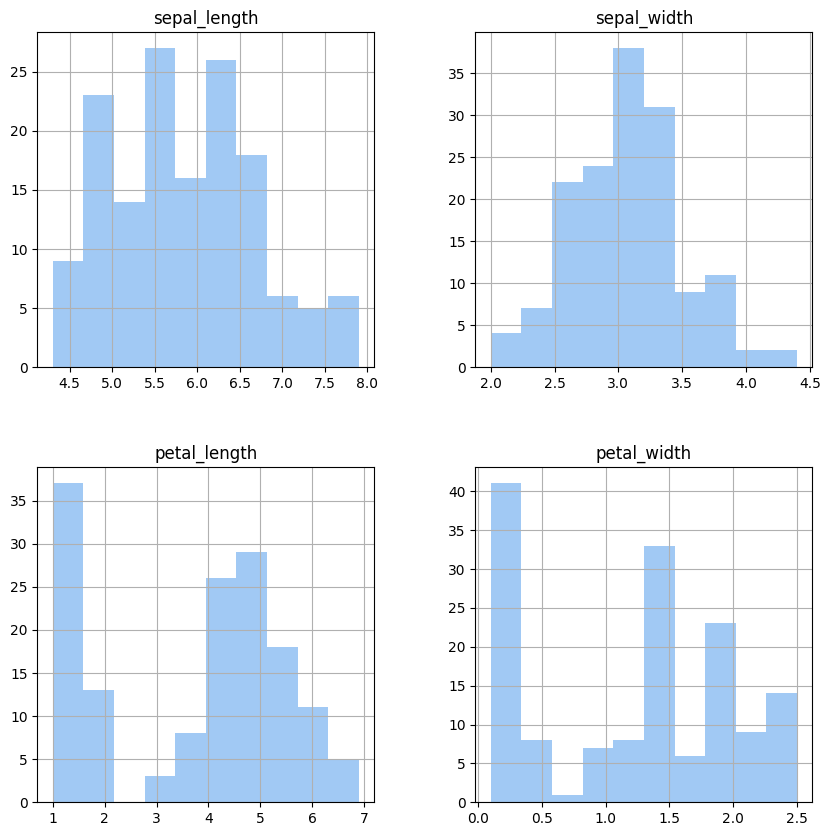

In [17]:
iris.hist(figsize=(10,10))
plt.show()

In [18]:
# Counting the values of species column
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

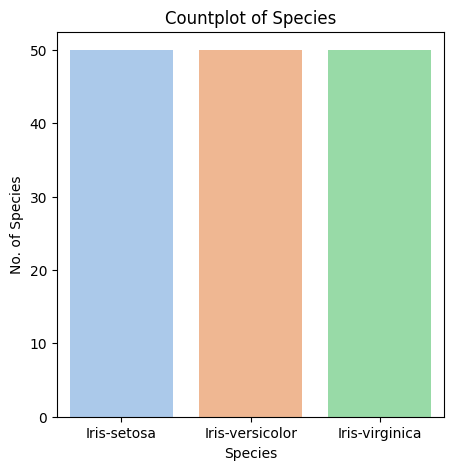

In [19]:
# Plotting Count Plot for Species Column
plt.figure(figsize=(5,5))
sns.countplot(data = iris, x = 'species')
plt.title('Countplot of Species')
plt.xlabel('Species')
plt.ylabel('No. of Species')
plt.show()

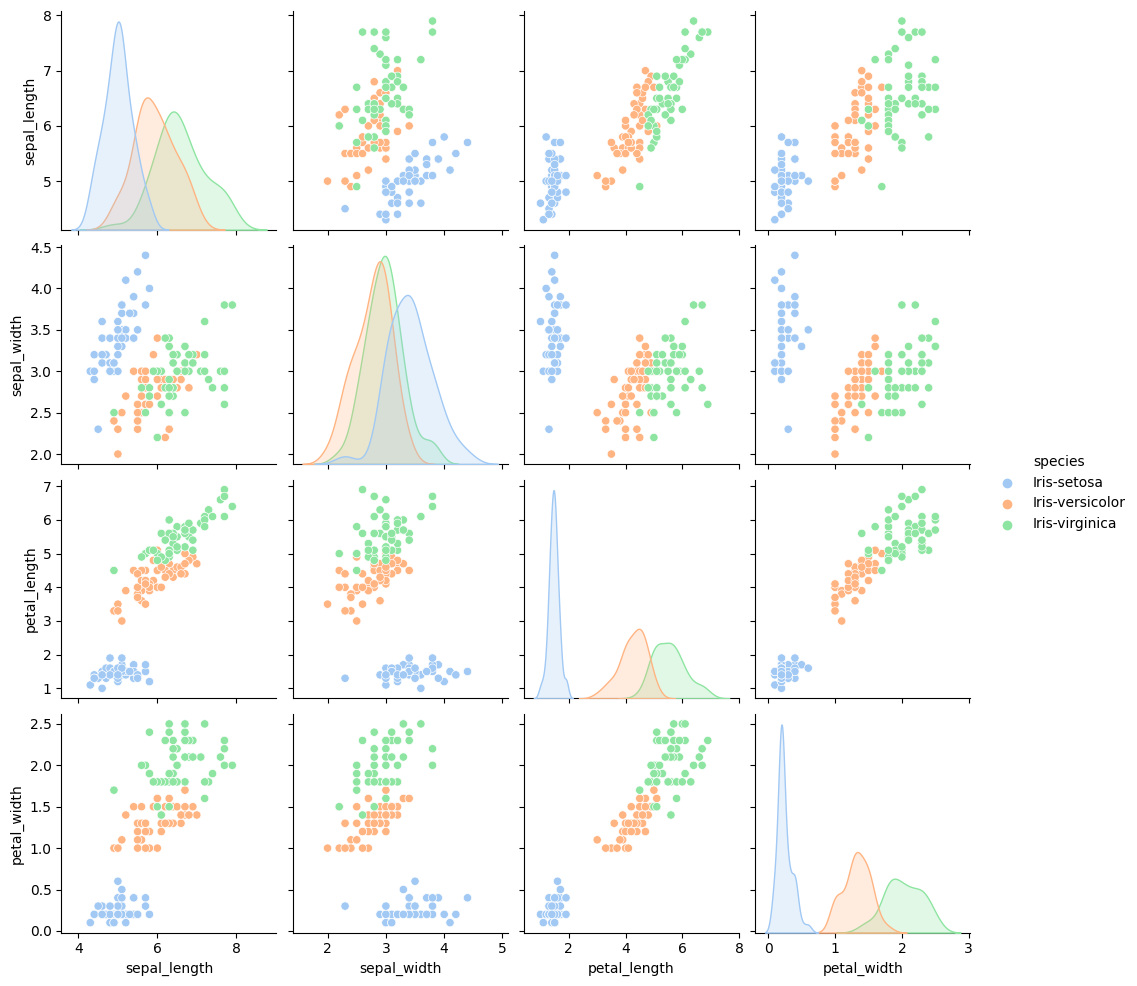

In [20]:
# Pairplot for the data
sns.pairplot(iris,hue='species')
plt.show()

<Axes: >

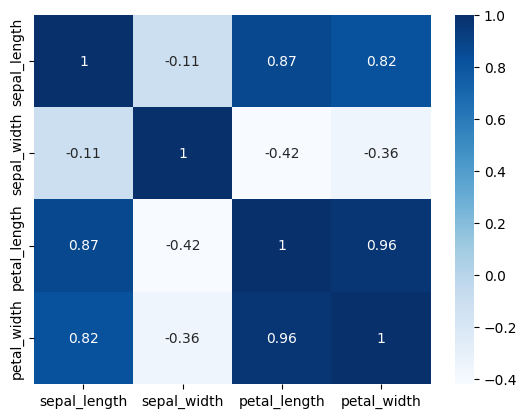

In [21]:
# Correlation plot for the data
sns.heatmap(iris.corr(),annot=True,cmap='Blues')

#Data Encoding

Encoding values of Class into numerical values using LabelEncoder() Module

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['species'] = le.fit_transform(iris['species'])
iris['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

#Selecting Dependent and Independent features

In [23]:
x = iris.drop('species',axis=1) # independent variable
y = iris['species']             # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(150, 4)
(150,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#Splitting the data into training and testing Data

In [24]:
# Importing Library
from sklearn.model_selection import train_test_split


In [25]:
# 30 % of 150
150*0.25

37.5

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=22)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


#Creating Functions to compute Confusion Matrix, Classifcation Report and to generate Training and Testing Score(Accuracy Score)

In [27]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [28]:
def eval_model(y_test,y_pred):
  cm = confusion_matrix(y_test,y_pred)
  print("Accuracy Score " , accuracy_score(y_test,y_pred))
  print("Confusion_Matrix\n",cm)
  print("Classification_Report\n",classification_report(y_test,y_pred))

def mscore(model):
  print("Training Score : ", model.score(x_train,y_train))  # Training Accuracy
  print("Testing Score : ", model.score(x_test,y_test))     # Testing Accuracy

#Decision Tree Classifier

In [29]:
# Importing library
from sklearn.tree import DecisionTreeClassifier

Building the Model

In [30]:
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)

DecisionTreeClassifier()

Generating the Training and Testing Score

In [31]:
mscore(dt)

Training Score :  1.0
Testing Score :  0.9210526315789473


Generting Predictions

In [32]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 2 1 2 1 1 1 1 1 0 2 1 2 2 0 2 1 1 1 1 0 2 0 1 2 0 2 2 2 1 0 0 1 1 1 0 0
 0]


Evaluate the Model

In [33]:
eval_model(y_test,ypred_dt)

Accuracy Score  0.9210526315789473
Confusion_Matrix
 [[11  0  0]
 [ 0 13  0]
 [ 0  3 11]]
Classification_Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.81      1.00      0.90        13
           2       1.00      0.79      0.88        14

    accuracy                           0.92        38
   macro avg       0.94      0.93      0.93        38
weighted avg       0.94      0.92      0.92        38



Plot Decision Tree

In [34]:
from sklearn.tree import plot_tree

In [35]:
# cn = class names
# fn = feature names
cn = ['0','1','2']
fn = x_train.columns
print(fn)
print(cn)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
['0', '1', '2']


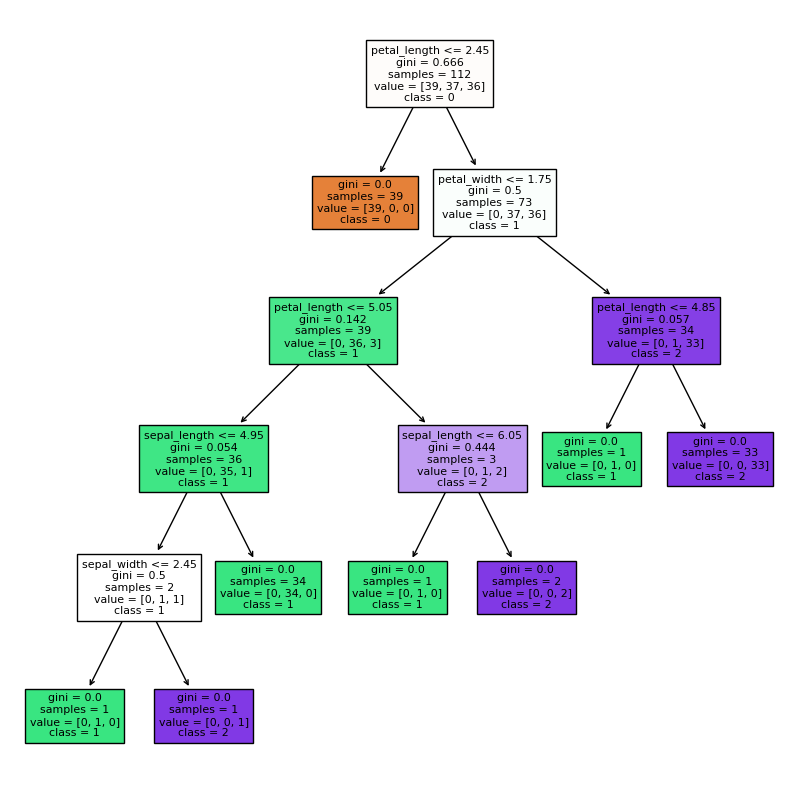

In [36]:
plt.figure(figsize=(10,10))
plot_tree(dt,feature_names=fn,class_names=cn,filled=True)
plt.show()

#Decision Tree with Entropy with the objective of tackling the Overfitting probelm

In [37]:
# Building the model
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [38]:
# Getting Training and Testing Score
mscore(dt1)

Training Score :  0.9821428571428571
Testing Score :  0.9210526315789473


In [39]:
# Generating Prediction
ypred_dt1 = dt1.predict(x_test)
print(ypred_dt1)

[0 2 1 2 1 1 1 1 1 0 2 1 2 2 0 2 1 1 1 1 0 2 0 1 2 0 2 2 2 1 0 0 1 1 1 0 0
 0]


In [40]:
# Evaluating the model
eval_model(y_test,ypred_dt1)

Accuracy Score  0.9210526315789473
Confusion_Matrix
 [[11  0  0]
 [ 0 13  0]
 [ 0  3 11]]
Classification_Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.81      1.00      0.90        13
           2       1.00      0.79      0.88        14

    accuracy                           0.92        38
   macro avg       0.94      0.93      0.93        38
weighted avg       0.94      0.92      0.92        38



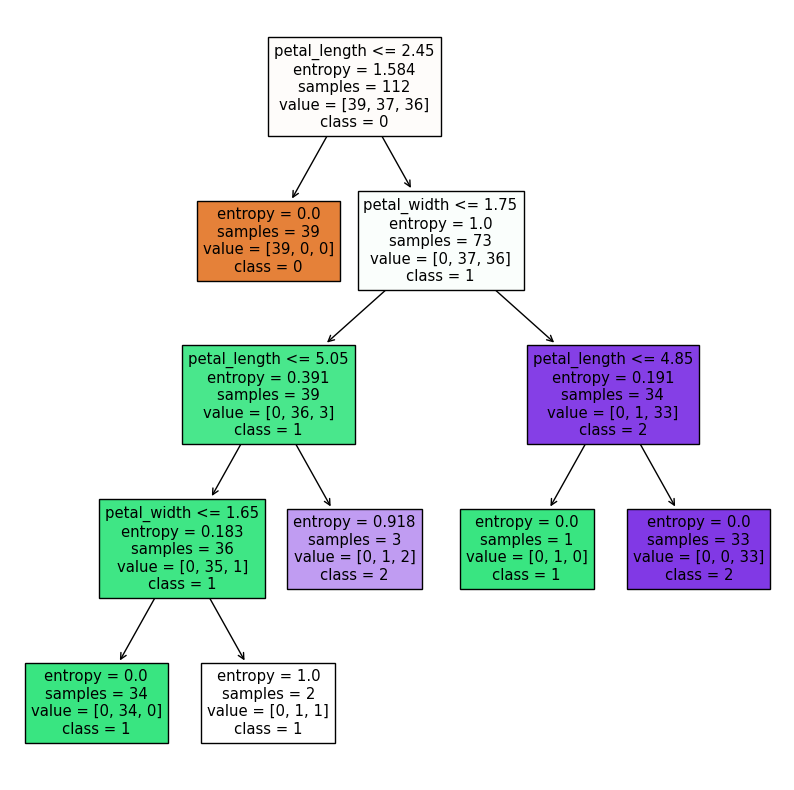

In [41]:
plt.figure(figsize=(10,10))
plot_tree(dt1,feature_names=fn,class_names=cn,filled=True)
plt.show()